In [155]:
# General functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EmpiricalCovariance

# Question 1

In [156]:
# Q1a
probs, x, y = [.1,.5,.4],[70,105,120],[140,125,115]
cost = 100*100+120*120
rf = 0.005

# Calculate Returns
q1 = pd.DataFrame(zip(probs, x, y), columns = ['Probability', 'X', 'Y'])
q1['X Return'], q1['Y Return'] = (q1.X*100 - 100*100) / (100*100), (q1.Y*120 - 120*120) / (120*120)
q1['X^2 Return'], q1['Y^2 Return'] = q1['X Return'] **2 , q1['Y Return']**2
q1['Total Returns'] = ((q1.X*100 + q1.Y*120)-cost)/cost

# Find variance
q1['ex'], q1['ey'] = q1.Probability * q1['X Return'], q1.Probability * q1['Y Return']
q1['ex^2'], q1['ey^2'] = q1.Probability * q1['X^2 Return'], q1.Probability * q1['Y^2 Return']
ex, ey, ex2, ey2 = q1.ex.sum(), q1.ey.sum(), q1['ex^2'].sum(), q1['ey^2'].sum()
var_x, var_y = np.sqrt(ex2 - ex**2), np.sqrt(ey2 - ey**2)

# Find covariance
q1['Weighted Cov'] = q1.Probability*(q1['X Return'] - ex) * (q1['Y Return'] - ey)
covar = q1['Weighted Cov'].sum()

# Correlation coef
correl_coef = covar/ (var_x* var_y)

# Source https://stats.stackexchange.com/questions/71275/how-to-calculate-the-weighted-covariance

# Q1b
# Find expected returns
q1['Weighted Return'] = q1['Total Returns'] * q1.Probability
exp_ret = q1['Weighted Return'].sum()

# Find stdev
q1['stdev'] = q1.Probability * (q1['Total Returns'] - exp_ret)**2
stdev = np.sqrt(q1['stdev'].sum())

# Source https://courses.lumenlearning.com/introstats1/chapter/mean-or-expected-value-and-standard-deviation/

# Find sharpe ratio 
sharpe = (exp_ret - rf) /stdev

titles, answers = ['Correlation Coefficient', 'Expected Return', 'Standard Deviation', 'Sharpe Ratio'], [correl_coef, exp_ret, stdev, sharpe]
[print(titles[i] + ': ' + str(answers[i].round(3))) for i in range(len(answers))]

q1

Correlation Coefficient: -0.986
Expected Return: 0.043
Standard Deviation: 0.023
Sharpe Ratio: 1.634


,Probability,X,Y,X Return,Y Return,X^2 Return,Y^2 Return,Total Returns,ex,ey,ex^2,ey^2,Weighted Cov,Weighted Return,stdev
0,0.1,70,140,-0.30,0.166667,0.0900,0.027778,-0.024590,-0.030,0.016667,0.00900,0.002778,-0.005469,-0.002459,0.000457
1,0.5,105,125,0.05,0.041667,0.0025,0.001736,0.045082,0.025,0.020833,0.00125,0.000868,-0.000260,0.022541,0.000002
2,0.4,120,115,0.20,-0.041667,0.0400,0.001736,0.057377,0.080,-0.016667,0.01600,0.000694,-0.003125,0.022951,0.000082


# Question 2

In [157]:
# Q2a
names, returns, stdev = ['A', 'B', 'C'], [.04, .19, .1], [0, .25, .15]
q2 = pd.DataFrame(zip(returns, stdev), index = names, columns = ['Returns', 'Stdev'])
q2['Var'] = q2.Stdev**2

# Investments
weight_b = np.sqrt(q2.at['C', 'Var']/ q2.at['B', 'Var'])
weight_a = 1-weight_b
amount, weights = 20000, [weight_a, weight_b, 0]

# Expected Returns
q2['Weighted Returns'] = q2.Returns * weights
er_p = q2['Weighted Returns'].sum()

[print('Invest $' + str(amount*weights[i]) + ' in ' +names[i]) for i in range(2)]
print('Expected Return for port: ' + str(er_p))

q2

Invest $8000.0 in A
Invest $12000.0 in B
Expected Return for port: 0.13


,Returns,Stdev,Var,Weighted Returns
A,0.04,0.00,0.0000,0.016
B,0.19,0.25,0.0625,0.114
C,0.10,0.15,0.0225,0.000


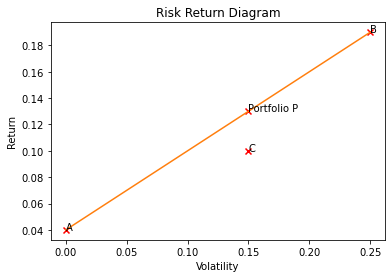

In [158]:
# Q2b
fig, ax = plt.subplots()
ax.set_title('Risk Return Diagram')
ax.set_xlabel('Volatility')
ax.set_ylabel('Return')
stdev.append(.15)
returns.append(er_p)
names.append('Portfolio P')

ax.scatter(stdev, returns, marker = 'x', label = names, color = 'red')
ax.plot(stdev[:2], returns[:2], color = 'tab:orange')

for i in range(len(returns)):
    ax.annotate(names[i], (stdev[i], returns[i]))

# Question 3

In [159]:
# Load df
q3 = pd.read_csv('q3_data.csv')

# Convert monthly returns from object to decimals form by stripping % and /100
for i in q3.columns[1:]:
    q3[i] = q3[i].str.rstrip('%').astype('float')

q3.head()

,Month,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds,Money Market
0,Jan 1985,-0.87,2.28,8.58,2.86,0.61
1,Feb 1985,-4.52,-0.56,1.70,-2.57,0.62
2,Mar 1985,8.10,7.79,-0.19,1.92,0.62
3,Apr 1985,0.67,-0.31,-0.22,2.21,0.65
4,May 1985,2.82,4.28,5.59,6.17,0.59


In [160]:
# Q3ai
# Average excess return of SB Non-US Bonds
sb_avg_ex = (q3["SB Non-US Bonds"] - q3["Money Market"]).mean()

# Average excess return of MSCI EAFE
msci_avg_ex = (q3["MSCI EAFE"] - q3["Money Market"]).mean()

# Average excess return of CRSP VW US common stocks
crsp_avg_ex = (q3["CRSP VW US common stocks"] - q3["Money Market"]).mean()

# Average excess return of US Corp Bonds
corp_avg_ex = (q3["US Corp Bonds"] - q3["Money Market"]).mean()

print("The average excess return of SB Non-US Bonds is", round(sb_avg_ex,3),"%." )
print("The average excess return of MSCI EAFE is", round(msci_avg_ex,3),"%.")
print("The average excess return of CRSP VW US common stocks is", round(crsp_avg_ex,3),"%." )
print("The average excess return of US Corp Bonds is", round(corp_avg_ex,3),"%.")

The average excess return of SB Non-US Bonds is 0.838 %.
The average excess return of MSCI EAFE is 1.029 %.
The average excess return of CRSP VW US common stocks is 0.846 %.
The average excess return of US Corp Bonds is 0.487 %.


In [161]:
# Q3aii
# Standard Deviation of excess return of SB Non-US Bonds
sb_sd_ex = (q3["SB Non-US Bonds"] - q3["Money Market"]).std()

# Standard Deviation of excess return of MSCI EAFE
msci_sd_ex = (q3["MSCI EAFE"] - q3["Money Market"]).std()

# Standard Deviation of excess return of CRSP VW US common stocks
crsp_sd_ex = (q3["CRSP VW US common stocks"] - q3["Money Market"]).std()

# Standard Deviation of excess return of US Corp Bonds
corp_sd_ex = (q3["US Corp Bonds"] - q3["Money Market"]).std()

print("The standard deviation of excess return of SB Non-US Bonds is", round(sb_sd_ex,3),"%." )
print("The standard deviation of excess return of MSCI EAFE is", round(msci_sd_ex,3) ,"%.")
print("The standard deviation of excess return of CRSP VW US common stocks is", round(crsp_sd_ex,3),"%." )
print("The standard deviation of excess return of US Corp Bonds is", round(corp_sd_ex,3),"%.")

The standard deviation of excess return of SB Non-US Bonds is 3.669 %.
The standard deviation of excess return of MSCI EAFE is 5.869 %.
The standard deviation of excess return of CRSP VW US common stocks is 4.737 %.
The standard deviation of excess return of US Corp Bonds is 1.564 %.


In [173]:
# Q3aiii
# Create a copy of the data and replace values as excess return
q3_copy = q3.copy()
Rf = q3['Money Market'].values.copy()
for column in q3_copy.columns:
    if column in ['Month','Money Market']:
        continue
    q3_copy[column] -= Rf

# Slicing dataframe to contain only relevant columns for covariance
q3_copy = q3_copy.iloc[:,[1,2,3,4]]
cov_matrix = (q3_copy.cov()/96*95)
cov_matrix

,SB Non-US Bonds,MSCI EAFE,CRSP VW US common stocks,US Corp Bonds
SB Non-US Bonds,13.319668,12.169076,-1.770503,1.684794
MSCI EAFE,12.169076,34.091031,11.595826,1.750397
CRSP VW US common stocks,-1.770503,11.595826,22.204123,2.610386
US Corp Bonds,1.684794,1.750397,2.610386,2.420373


In [174]:
# Q3bi
# Define functions
# Note: Did not subtract rf for Tangency portfolio calculations since the excess risk free returns for each stock already accounted for

def gmv(V):
    
    ###########
    # Construct the global minimum variance portfolio using the closed form method
    # Input: V is the estimated covariance matrix
    #        NB: the expected return vector is not needed here!
    # Output: The weights of the global minimum variance portfolio
    ###########

    #GMV
    n = len(V)
    w_g = np.linalg.inv(V) @ np.ones(n)
    w_g /= np.sum(w_g)
    
    return w_g

def tangency(mu, V):
    
    ###########
    # Construct the tangency portfolio using the closed form method
    # Input: mu is Estimated expected vector and V is the estimated covariance matrix
    # Output: The weights of the tangency portfolio
    ###########

    
    #tangency portfolio
    w_t = np.linalg.inv(V) @ mu
    w_t /= np.sum(w_t)

    return w_t

averages = np.array([sb_avg_ex,msci_avg_ex,crsp_avg_ex,corp_avg_ex])

print("The weights for the GMV portfolio is", ["%.5f"%i for i in gmv(cov_matrix)])
print("The weights for the tangency portfolio is", ["%.5f"%i for i in tangency(averages, cov_matrix)])
print("Negative weights means that we take a short position on the stock for the portfolio instead.")

The weights for the GMV portfolio is ['0.06087', '-0.00088', '0.00208', '0.93793']
The weights for the tangency portfolio is ['0.26592', '-0.03509', '0.14398', '0.62519']
Negative weights means that we take a short position on the stock for the portfolio instead.


In [175]:
# Q3bii
# Source: https://www.kaggle.com/code/vijipai/lesson-6-sharpe-ratio-based-portfolio-optimization
from scipy import optimize 
from scipy.optimize import minimize

sd = [sb_sd_ex,msci_sd_ex,crsp_sd_ex,corp_sd_ex]

def MaximizeSharpeRatioOptmzn(MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
    
    # define maximization of Sharpe Ratio using principle of duality
    def  f(x, MeanReturns, CovarReturns, RiskFreeRate, PortfolioSize):
        funcDenomr = np.sqrt(np.matmul(np.matmul(x, CovarReturns), x.T) )
        funcNumer = np.matmul(np.array(MeanReturns),x.T)-RiskFreeRate
        func = -(funcNumer / funcDenomr)
        return func

    #define equality constraint representing fully invested portfolio
    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    
    #define bounds and other parameters
    xinit=np.repeat(0.33, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])
    
    #invoke minimize solver
    opt = optimize.minimize (f, x0 = xinit, args = (MeanReturns, CovarReturns,\
                             RiskFreeRate, PortfolioSize), method = 'SLSQP',  \
                             bounds = bnds, constraints = cons, tol = 10**-3)
    
    return opt

print("The weights for the Maximum Sharpe Ratio portfolio is", ["%.5f"%i for i in MaximizeSharpeRatioOptmzn(averages, cov_matrix, 0, 4)['x']])

The weights for the Maximum Sharpe Ratio portfolio is ['0.23056', '0.00000', '0.12444', '0.64500']


In [176]:
# Q3biii
# Define functions needed for the plot
##Q3b(iii)
def evaluate_portfolio_performance_on_data(w, data_evaluate):
    
    ###########
    # Evaluate the performance of a portfolio (i.e., weight vector) given the return data to evaluate on
    # Input: data contains historical return information (every column corresponds to an asset)
    #        w is the portfolio weight vector
    #        (NB: risk-free rate has already been assumed to be zero)
    # Output: The performance metrics of the portfolio 
    #         (i.e., expected return, standard deviation, variance, and Sharpe ratio)
    ###########
    
    # Sanity check for the input format
    w = w.reshape((-1))
    if (data_evaluate.shape[1] != len(w)):
        print('Warning: data and w should contain the same number of assets')
    ### End of sanity check
    
    V = cov_matrix
    mu = averages
    
    
    return {'Er': mu.T @ w, 'sigma': np.sqrt(w.T @ V @ w), 
            'var': w.T @ V @ w, 'Sharpe': (mu.T @ w - 0)/(np.sqrt(w.T @ V @ w)) }

def get_EF_on_data (w_t, w_g, data_evaluate):

    ###########
    # Get the (evaluated) efficient frontier curve using the two-fund separation method
    #
    # Input: data contains historical return information to evaluate on (every column corresponds to an asset)
    #        w_t and w_g are the constructed tangency and global minimum variance portfolios, respectively
    #        (NB: if w_t and w_g are obtained from the training data but "data" is actually testing data,
    #         then the output EF could be highly sub-optimal!)
    # Output: The risk-return combinations of portfolios on the (evaluated) EF 
    ###########
    
    trange = np.arange(0,8.1,0.01)
    sigma_range = np.zeros_like (trange) * np.nan
    Er_range = np.zeros_like (trange) * np.nan

    for i in np.arange(len(trange)):
        w_mix = trange[i] * w_t + (1-trange[i]) * w_g
        sigma_range[i] = evaluate_portfolio_performance_on_data (w_mix, data_evaluate) ['sigma']
        Er_range[i] = evaluate_portfolio_performance_on_data (w_mix, data_evaluate) ['Er']
        
    return sigma_range, Er_range

def plot_evaluation_results_in_sample (data_train):

    ###########
    # A Summary function
    #
    # Input: The portfolios are all obtrained from "data_train"; 
    #        Their performances are all evaluated on "data_train" as well
    # Output: A plot that contrains tangency portfolio, GMV, EF, and equally weighted portfolio
    ###########
    
    # Obtain the tangency, GMV, equally weighted portfolios from the TRAINING data
    mu_train = averages
    V_train = cov_matrix

    w_t_train = tangency(mu_train , V_train)
    w_g_train = gmv(V_train)
    w_s_train = MaximizeSharpeRatioOptmzn(mu_train, cov_matrix, 0, 4)['x']

    
    print('The in-sample tangency portfolio is: ', w_t_train)
    print('The in-sample global minimum variance portfolio is: ', w_g_train)
    print('The in-sample maximum sharpe ratio portfolio is: ', w_s_train)
    
    sigma_range, Er_range = get_EF_on_data (w_t_train, w_g_train, data_train)
    plt.plot(sigma_range, Er_range, label = 'EF')
    
    # tangency portfolio (TAN)
    plt.scatter( evaluate_portfolio_performance_on_data (w_t_train, data_train)['sigma'], evaluate_portfolio_performance_on_data (w_t_train, data_train)['Er'], marker='*', color = 'grey',label = 'TAN')
    
    # global minimum variance portfolio (GMV)
    plt.scatter( evaluate_portfolio_performance_on_data (w_g_train, data_train)['sigma'], evaluate_portfolio_performance_on_data (w_g_train, data_train)['Er'], marker='^', color = 'purple',label = 'GMV')
    
    # maximum Sharpe ratio portfolio
    plt.scatter( evaluate_portfolio_performance_on_data (w_s_train, data_train)['sigma'], evaluate_portfolio_performance_on_data (w_s_train, data_train)['Er'], marker='+', color = 'red',label = 'Max Sharpe')

    #SB Non-US Bonds	MSCI EAFE	CRSP VW US common stocks	US Corp Bonds
    plt.scatter(sb_sd_ex ,sb_avg_ex, marker='o', color = 'blue',label = 'SB')
    plt.scatter(msci_sd_ex ,msci_avg_ex, marker='o', color = 'magenta',label = 'MSCI')
    plt.scatter(crsp_sd_ex ,crsp_avg_ex, marker='o', color = 'green',label = 'CRSP')
    plt.scatter(corp_sd_ex ,corp_avg_ex, marker='o', color = 'orange',label = 'CORP')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Risk-Return Diagram (In-sample Analysis)')
    plt.xlabel('$\sigma$ (%)')
    plt.ylabel('E[r] (%)')
    
    plt.show()


The in-sample tangency portfolio is:  [ 0.26591555 -0.03508855  0.14397928  0.62519372]
The in-sample global minimum variance portfolio is:  [ 6.08702525e-02 -8.80976812e-04  2.08125460e-03  9.37929470e-01]
The in-sample maximum sharpe ratio portfolio is:  [2.30561690e-01 4.93859360e-17 1.24438181e-01 6.45000129e-01]


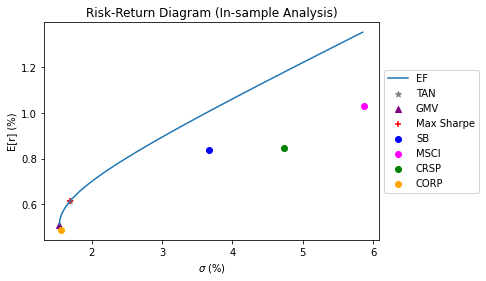

In [177]:
plot_evaluation_results_in_sample(q3_copy)

# Question 4

In [178]:
# Q4a
df_V = pd.DataFrame(data={'Stock 1': [0.16, 0.02, 0.064], 
                        'Stock 2': [0.02, 0.09, 0.032], 
                        'Market': [0.064, 0.032, 0.04]}, 
                    index = ['Stock 1', 'Stock 2','Market'])

var_1, var_2 = df_V.at['Stock 1', 'Stock 1'], df_V.at['Stock 2', 'Stock 2']
weights = [.4,.4,.2]
portfolio_variance = (weights[0]**2*var_1 + weights[1]**2*var_2 + weights[2]**2*0
                    +weights[0]*weights[1]*df_V.at['Stock 1', 'Stock 2'] 
                    +weights[1]*weights[0]*df_V.at['Stock 2', 'Stock 1'])
print('Q4a')
print('     Variance of portfolio, P: ' + str(round(portfolio_variance,3)))

# Q4b
var_mkt = df_V.at['Market', 'Market']

def beta(asset_name, var_mkt):
    return df_V.at[asset_name, 'Market']/var_mkt

beta_1, beta_2 = beta('Stock 1', var_mkt), beta('Stock 2', var_mkt)
beta_P = beta_1*weights[0] + beta_2*weights[1] + 0*weights[2] # Source for portfolio beta: https://www.nasdaq.com/glossary/p/portfolio-beta
print('Q4b')
print('     Beta 1: ' + str(round(beta_1,3)))
print('     Beta 2: ' + str(round(beta_2,3)))
print('     Portfolio Beta: ' + str(round(beta_P,3)))

# Q4b (i)
rf, er_mkt =0.04, .1
er_P = rf + beta_P*(er_mkt-rf)
print('Q4b (i)')
print('     Expected Return of portfolio, P (CAPM): ' + str(round(er_P*100,3)) +'%')

# Q4b (ii)

# Solving the equation
# portfolio_variance =weight_m**2*var_mkt + (1-weight_m)**2*0 + weight_m*(1-weight_m)*0 + weight_m*(1-weight_m)*0 
weight_m = np.sqrt(portfolio_variance/var_mkt)
er_new_P = weight_m*er_mkt + (1-weight_m)*rf
print('Q4b (ii)')
print('     Expected Return of new portfolio: ' + str(round(er_new_P*100,3)) +'%')

Q4a
     Variance of portfolio, P: 0.046
Q4b
     Beta 1: 1.6
     Beta 2: 0.8
     Portfolio Beta: 0.96
Q4b (i)
     Expected Return of portfolio, P (CAPM): 9.76%
Q4b (ii)
     Expected Return of new portfolio: 10.462%


# Question 5

In [179]:
# Load df
df = pd.read_csv(r'q5_data.csv', index_col = "Date")
cols = df.columns.tolist()
print(cols)

['Market: World', 'Market: US', 'S&P 500', 'Long Term Bond', 'Corp Bnd', 'HML', 'SMB', 'Long - Short', 'T-bills', 'Inflation', 'TOYOTA', 'GM', 'BMW', 'FORD', 'CHRYSLER', 'APPLE', 'IBM', 'COMPAQ', 'HP', 'BUSCH', 'HEINEKEN', 'KIRIN', 'MOLSON']


In [180]:
# Convert to excess rets
excess_rets = df
excess_rets = excess_rets.apply(lambda x: (x - df['T-bills']))

# Create portfolios 
stock_list, port_dict = ['GM', 'IBM', 'BUSCH', 'TOYOTA'], {}

port_dict['p1'] = excess_rets[stock_list[0:2]]
port_dict['p2'] = excess_rets[stock_list[0:3]]
port_dict['p3'] = excess_rets[stock_list]
port_dict['p4'] = excess_rets[cols[-13:]]


In [181]:
# Get excess rets and variances
avgs, vars = [], []
for p in port_dict.values():
    c = p.columns.tolist()
    p['p_ret'] = p[c].mean(axis = 1)
    avgs.append(p['p_ret'].mean())
    vars.append(p['p_ret'].var())

df_5ai = pd.DataFrame(zip(avgs, vars), index = ['Portfolio ' + str(i) for i in range(1,5)], columns = ['Avg. Excess Returns', 'Variance'])
df_5ai

,Avg. Excess Returns,Variance
Portfolio 1,0.493077,40.823464
Portfolio 2,0.727158,27.451463
Portfolio 3,0.857276,20.997874
Portfolio 4,1.223836,25.107992


In [182]:
# Add portfolio returns into the excess returns
for n,p in enumerate(port_dict.values(), start= 1):
    excess_rets['Portfolio ' + str(n)] = p['p_ret']

# Get cov matrix of everything
cov_df = excess_rets.cov()

# Get the market variance
mkt_var = cov_df.at['Market: World','Market: World']

# Plot lin reg and fit with values 
reg_slopes = []
for i in excess_rets.iloc[:, -4:].columns.tolist():
    linreg = LinearRegression()
    linreg.fit(excess_rets['Market: World'].values.reshape(-1, 1), excess_rets[i].values.reshape(-1, 1))
    reg_slopes.append(linreg.coef_[0][0].round(3))

# Covariances
cov_stocks = cov_df.iloc[-17:-4, 0:1]
cov_port = cov_df.iloc[-4:, 0:1]
cov_beta = [(i/mkt_var).round(3) for i in cov_port['Market: World'].values.tolist()]

df_5aii = pd.DataFrame(zip(reg_slopes, cov_beta), 
                    index = ['Portfolio ' + str(i) for i in range(1,5)], 
                    columns = ['Regression Slope', 'Covariance Beta'])

df_5aii

,Regression Slope,Covariance Beta
Portfolio 1,0.761,0.761
Portfolio 2,0.720,0.720
Portfolio 3,0.778,0.778
Portfolio 4,0.931,0.931


Text(0.5, 1.0, 'Variance Comparison')

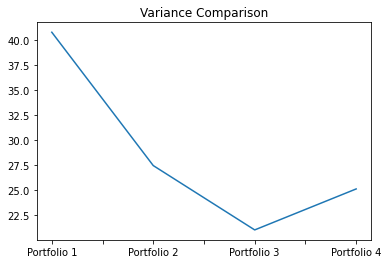

In [183]:
ax = df_5ai['Variance'].plot(kind='line')
ax.set_title('Variance Comparison')

Text(0.5, 1.0, 'Beta Comparison')

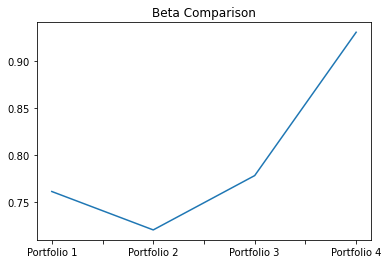

In [184]:
ax = df_5aii['Covariance Beta'].plot(kind='line')
ax.set_title('Beta Comparison')

In [185]:
# Store betas in a dict
stock_betas = [(i/mkt_var).round(3) for i in cov_stocks['Market: World'].values.tolist()]
stock_beta_dict = dict(zip(cols[-13:],stock_betas))

port_betas_from_stocks = []
for i in [stock_list[0:2], stock_list[0:3],stock_list, cols[-13:]]:
    a = []
    for j in i:
        a.append(stock_beta_dict[j])
    port_betas_from_stocks.append(np.mean(a).round(3))

df_5aii['Stock Betas'] = port_betas_from_stocks
df_5aii

,Regression Slope,Covariance Beta,Stock Betas
Portfolio 1,0.761,0.761,0.761
Portfolio 2,0.720,0.720,0.720
Portfolio 3,0.778,0.778,0.778
Portfolio 4,0.931,0.931,0.931


In [195]:
# Stock excess returns
stock_excesses = [excess_rets[i].mean() for i in cols[-13:]]

# CAPM returns
rf = df['T-bills'].mean()
rp = excess_rets['Market: World'].values.mean()
capm_returns = [(rf + i*rp).round(3) for i in stock_betas]

df_5bii = pd.DataFrame(zip(stock_betas, stock_excesses, capm_returns), columns = ['Beta', 'Returns', 'CAPM Returns'], index = cols[-13:])
df_5bii

,Beta,Returns,CAPM Returns
TOYOTA,0.954,1.247628,1.282
GM,0.848,0.555897,1.191
BMW,1.032,1.439487,1.349
FORD,0.929,1.426026,1.260
CHRYSLER,1.113,1.401282,1.419
APPLE,0.864,0.414808,1.204
IBM,0.674,0.430256,1.041
COMPAQ,1.070,3.580256,1.382
HP,1.049,1.350000,1.364
BUSCH,0.638,1.195321,1.010
